# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Оглавление
1. [Открытие данных](#start)
2. [Предобработка данных](#processing)
* 2.1 [Обработка пропущенных значений](#null)
* 2.2 [Замена типов данных](#astype)
3. [Добавление данных в таблицу](#add)
* 3.1 [Сколько стоит квадратный метр?](#sqmeter)
* 3.2 [Когда было опубликовано объявление?](#time)
* 3.3 [На каком этаже квартира?](#floor)
* 3.4 [Какова доля жилой площади квартиры?](#living)
* 3.5 [Какую долю общей площади занимает кухня?](#kitcnen)
4. [Исследование данных о продаже квартир](#research)
* 4.1 [Площадь, цена, число комнат, высота потолков в квартирах](#general)
* 4.2 [Сколько обычно длится продажа квартиры?](#howlong)
* 4.3 [Анализ редких значений и выбросов](#rare)
* 4.4 [Что влиет на стоимость квартиры?](#price)
* 4.5 [В каких населенных пунктах больше всего объявлений о продаже?](#local)
* 4.6 [Как цена зависит от удаленности от центра Санкт-Петербурга?](#suburb)
* 4.7 [В чем особенность квартир в центре Санкт-Петербурга?](#center)
5. [Общий вывод](#conclusion)


## 1 Открытие данных<a id="#start"></a>

Импортируем Pandas и откроем нашу таблицу, присвоим ей имя *data*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Рассмотрим каждый столбец по отдельности: 
* *airports_nearest* — расстояние до ближайшего аэропорта в метрах (м)
* *balcony* — число балконов
* *ceiling_height* — высота потолков (м)
* *cityCenters_nearest* — расстояние до центра города (м)
* *days_exposition* — сколько дней было размещено объявление (от публикации до снятия)
* *first_day_exposition* — дата публикации
* *floor* — этаж
* *floors_total* — всего этажей в доме
* *is_apartment* — апартаменты (*да* или *нет*)
* *kitchen_area* — площадь кухни в квадратных метрах (м²)
* *last_price* — цена на момент снятия с публикации
* *living_area* — жилая площадь в квадратных метрах (м²)
* *locality_name* — название населённого пункта
* *open_plan* — свободная планировка (*есть* или *нет*)
* *parks_around3000* — число парков в радиусе 3 км
* *parks_nearest* — расстояние до ближайшего парка (м)
* *ponds_around3000* — число водоёмов в радиусе 3 км
* *ponds_nearest* — расстояние до ближайшего водоёма (м)
* *rooms* — число комнат
* *studio* — квартира-студия (*да* или *нет*)
* *total_area* — площадь квартиры в квадратных метрах (м²)
* *total_images* — число фотографий квартиры в объявлении

Получим общую информацию о таблице, типах данных и числе пропущенных значений:

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

В таблице два столбца с булевыми значениями (*studio* и *open_plan*), а также три столбца с типом "строка", в них указаны дата публикации, название населенного пункта, а также является ли квартира апартаментами. В остальных столбцах находятся числовые значения с типом данных *float* или *int*.  

### Вывод

Заметен большой разброс в стоимости квартир, что неудивительно, ведь в таблице представлены и квартиры в центре Петербурга (их цена очевидно высока), и жилье в пригороде — там его стоимость существенно ниже. 

В основном представлены 1-, 2- и 3-комнатные квартиры, при этом разница в площади, например, трехкомнатных квартир достигает почти 100 кв. метров (от 61 до 159 кв. м). В столбце *is_apartment* в начале таблицы не встречаются значения *True*, что позволяет сделать вывод, что объявлений о продаже апартаментов (нежилых помещений) очень мало. 

Интересно также взглянуть на то, сколько дней было опубликовано объявление. Есть квартиры, которые ждали продажи около полутора лет, но есть и проданные всего за неделю. 

## 2 Предобработка данных <a id="processing"></a>

На предыдущем этапе методом *info()* мы получили общую информацию о данных в столбцах. Необходимо выяснить, где и каким способом заполнить пропуски, а также в каких столбцах нужно заменить тип данных. 

### 2.1 Обработка пропущенных значений <a id="null"></a>

Первый столбец с пропусками — *ceiling_height*, в нем указана высота потолков в метрах. Старые дома в центре Петербурга известны своими высокими потолками, но есть и типовые низкоэтажные хрущевки с потолками в 2,5 метра. У современных домов также нет единого стандарта. Так как у нас нет данных о годе постройки или серии домов, мы не можем заполнить пропуски какими-либо средними значениями. Правильнее будет оставить NaN-значения пустыми.  

В столбце с жилой площадью *living_area* пропуски можно заменить на медианное значение. У нас есть количестве комнат в квартирах — медиану жилой площади можно вычислить исходя из этих параметров: 

In [3]:
#заполним пропуски медианой, сгруппировав данные по количеству комнат и применив метод trasnsform()
data['living_area'] = data['living_area'].fillna(data.groupby('rooms')['living_area'].transform('median'))
#проверим, остались ли пропуски в столбце
data['living_area'].isna().sum()

0

В столбце с площадью кухни также встречаются пропуски. Можем их заполнить, вычислив разницу между общей площадью квартиры и жилой площадью

In [4]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] - data['living_area'])
#проверим количество пропусков в столбце после замены
data['kitchen_area'].isna().sum()

0

В столбце *floors_total* пропуски можно заменить медианой по этажу, на котором находится квартира. Снова применим метод *transform*:

In [5]:
data['floors_total'] = data['floors_total'].fillna(data.groupby('floor')['floors_total'].transform('median'))
#проверим количество пропусков
data['floors_total'].isna().sum()

0

В *is_apartment* значение *True* принимают нежилые помещения (апартаменты), а значение *False* — обычные квартиры. Можно предположить, что пропущенные значения относятся к последним. Заменим все пропуски на *False* 

In [6]:
data['is_apartment'] = data['is_apartment'].fillna(False)
#проверим уникальные значения в столбце методом value_counts()
data['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

Пропуски в столбце *balcony* можно объяснить тем, что балконов в квартире нет. Тогда можно заменить пропущенные значения на нули:

In [7]:
data['balcony'] = data['balcony'].fillna(0)
#проверим, сколько квартир без балконов
data['balcony'].value_counts()

0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

Заменить пропущенные значения в *locality_name* (название населенного пункта) не представляется возможным. Соответственно, значения столбцов, которые были сформированы автоматически на основе картографических данных, заполнить также невозможно. Поэтому в столбцах с информацией о расстоянии до центра города и аэропортов, о ближайших парках и водоемах пропуски оставим незаполненными.

Еще один автоматически собранный столбец — *days_exposition* — с указанием, сколько дней было размещено объявление. Пропуски в нем можно объяснить тем, что объявление еще не снято с публикации — то есть квартира пока не продана. 

### Вывод

Заполнили пропуски в таблице, где это было возможно. Медианным значением заменили общее количество этажей в доме и жилую площадь квартиры. Площадь кухни узнали из разницы между общей и жилой площадью. Пропуски в столбцах с указанием количества балконов поменяли на нули; оставили в *is_apartment* значение *False* для жилых помещений. Приняли решение оставить пустыми строки в столбцах, данные которых были получены автоматически (расстояние до центра города и аэропорта, информация о ближайших парках и водоемах). Также не заполнили пустые данные в столбце *days_eposotion* — эти квартиры еще не проданы.  

### 2.2 Замена типов данных <a id="astype"></a>

В нескольких столбцах требуется замена данных с *float64* на *int64*. В *last_price* — потому что не имеет смысла высчитывать стоимость квартиры с точностью до копейки. В *floors_total* и *balcony* — количество этажей и балконов по определению должно быть целым. Также столбец *is_apartment* из типа *object* лучше привести к булевому — там уже содержатся только значения *True* или *False*.

Заменим тип данных в этих столбцах методом *astype()*

In [8]:
data['last_price'] = data['last_price'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['is_apartment'] = data['is_apartment'].astype('bool')

Выведем на экран первые 5 строк этих трех столбцов и проверим, сработала ли замена типа данных:

In [9]:
data[['last_price', 'floors_total', 'balcony', 'is_apartment']].head()

,last_price,floors_total,balcony,is_apartment
0,13000000,16,0,False
1,3350000,11,2,False
2,5196000,5,0,False
3,64900000,14,0,False
4,10000000,14,0,False


### Вывод

Заменили тип данных столбцов с ценой, общим количеством этажей и балконов с вещественных на целые числа. В дальнейшем нам будет проще проводить вычисления с этими данными. В столбце с информацией о том, является ли квартира апартаментами, поменяли значения на булевые. Также можно было бы изменить типы данных, например, в столбцах с указанием расстояния до центра города или до ближайшего парка. Но в них остались пустые значения, а заменить их на целые числа невозможно. 

## 3 Добавление данных в таблицу <a id="add"></a>

Для нашего исследования необходимо выяснить дополнительные параметры, исходя из имеющихся данных в таблице. 

### 3.1 Сколько стоит квадратный метр? <a id="sqmeter"></a>

Посчитаем стоимость квадратного метра для каждой квартиры. Создадим новый столбец *price_sq_meter*, в котором вычислим частное цены на момент снятия с публикации и площади квартиры в квадратных метрах: 

In [10]:
data['price_sq_meter'] = data['last_price'] / data['total_area']
#выведем 5 случайных строк столбцов last_price, total_area и price_sq_meter
data[['last_price', 'total_area', 'price_sq_meter']].sample(5)

,last_price,total_area,price_sq_meter
5144,18100000,116.00,156034.482759
261,4600000,83.69,54964.750866
17284,1900000,38.00,50000.000000
22497,3500000,45.70,76586.433260
7630,850000,53.00,16037.735849


Так как мы делили целое число (*last_price*) на вещественное (*total_area*), новый столбец *price_sq_meter* также имеет тип данных *float64*. Заменим его на *int*:

In [11]:
data['price_sq_meter'] = data['price_sq_meter'].astype('int')
#снова выведем 5 случайных строк трех столбцов 
data[['last_price', 'total_area', 'price_sq_meter']].sample(5)

,last_price,total_area,price_sq_meter
20758,4150000,44.0,94318
1758,7300000,62.0,117741
154,8200000,80.0,102500
779,5100000,40.4,126237
204,3600000,44.2,81447


### Вывод

Вычислили стоимость квадратного метра жилья, используя данные о цене квартиры и ее площади. Заменили получившиеся значения на целые числа.

### 3.2 Когда было опубликовано объявление? <a id="time"></a>

Нам необходимо выяснить, когда появилось объявление о продаже. Нас интересует день недели, месяц и год публикации. Заметим, что точное время выхода публикации равно 00:00:00.

Приведем столбец *first_day_exposition* к типу данных *datetime64* (сейчас тип данных — *object*):

In [12]:
#применим метод pd.to_datetime к столбцу first_day_exposition
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
#выведем 5 случайных строк двух столбцов с датами и числом дней публикации
data[['first_day_exposition', 'days_exposition']].sample(5)

,first_day_exposition,days_exposition
16076,2018-11-02,107.0
3633,2018-09-25,16.0
20735,2016-06-04,182.0
6955,2017-11-11,82.0
13530,2017-11-12,34.0


В результате в столбце *first_day_exposition* остались только год, месяц и день публикации, при этом данные о времени были удалены. 

Теперь можно получить информацию о дне недели публикации. Создадим столбец *weekday*, в котором 0 = понедельник, 1 = вторник, и т. д.

In [13]:
#выясним день недели публикации с помощью метода dt.weekday
data['weekday'] = data['first_day_exposition'].dt.weekday

Создадим столбец *month* с указанием месяца публикации, где 1 = январь, 12 = декабрь. Также создадим столбец *year* — с годом публикации

In [14]:
#определим месяц методом dt.month
data['month'] = data['first_day_exposition'].dt.month
#выясним год публикации методом dt.year
data['year'] = data['first_day_exposition'].dt.year

#выведем 10 рандомных строк со столбцами first_day_exposition, weekday, month и year
data[['first_day_exposition', 'weekday', 'month', 'year']].sample(10)

,first_day_exposition,weekday,month,year
16871,2017-12-04,0,12,2017
1600,2017-11-10,4,11,2017
3127,2017-11-29,2,11,2017
20635,2014-11-27,3,11,2014
12646,2017-01-11,2,1,2017
272,2018-09-21,4,9,2018
6010,2018-08-13,0,8,2018
17835,2018-03-09,4,3,2018
18627,2017-03-22,2,3,2017
5780,2019-04-04,3,4,2019


### Вывод

В столбце *first_day_exposition* привели значения к типу данных *datetime*. Данные о точном времени публикации удалились, потому как в исходной таблице время было одинаковым — ровно полночь. Также создали новые столбцы *weekday*, *month* и *year* с указанием дня недели, месяца и года публикации объявления. 

### 3.3 На каком этаже квартира? <a id="floor"></a>

Для исследования нам необходимо разбить указанные в объявлениях этажи на три категории: первый этаж, последний или другой.

Создадим функцию, в которой:
* если номер этажа 1, функция вернет значение "первый"
* если номер этажа равен общему числу этажей в доме, функция вернет значение "последний"
* для остальных этажей функция вернет значение "другой"

In [15]:
#создадим функцию floor_category 
def floor_category(floor):
    last_floor = floor['floors_total'] #переменная задает общее количество этажей в доме, она же равна последнему этажу
    floor = floor['floor'] #задает номер этажа в одноименном столбце
    if floor == 1: 
        return 'первый'
    if floor == last_floor:
        return 'последний'
    else:
        return 'другой'

#создадим новый столбец floor_category, в котором будут указаны три категории
data['floor_category'] = data.apply(floor_category, axis = 1)
#выведем 10 случайных строк столбцов floor, floors_total и floor_category 
data[['floor', 'floors_total', 'floor_category']].sample(10)

,floor,floors_total,floor_category
1883,24,24,последний
21834,13,16,другой
18417,18,19,другой
7514,3,4,другой
13285,7,14,другой
23301,8,9,другой
3367,5,10,другой
16505,4,5,другой
9296,4,9,другой
19664,7,9,другой


Построим круговую диаграмму, чтобы узнать, какую долю в нашей таблице занимают квартиры на первом, на последнем или любом другом этаже.

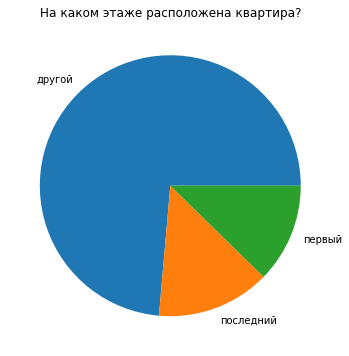

In [16]:
#вычислим кол-во уникальных значений в столбце floor_category и на этих данных построим круговую диаграмму 
data['floor_category'].value_counts().plot(kind='pie', title='На каком этаже расположена квартира?', figsize=(6, 6))
plt.ylabel('')
plt.show()

### Вывод

Создали новый столбец, в котором указали, на каком этаже расположена квартира: на первом, последнем или каком-либо другом. В нашей таблице доля жилья на первом и последнем этаже составляет приблизительно по 15 % каждая, остальные приблизительно 70 % квартир расположены на любом другом этаже.

### 3.4 Какова доля жилой площади квартиры? <a id="living"></a>

Выясним соотношение жилой к общей площади квартиры. Нужно поделить значения столбца *living_area* на значения из *total_area*. Создадим новый столбец *living_area_ratio* и запишем в него результат:

In [17]:
data['living_area_ratio'] = data['living_area'] / data['total_area']
#выведем первые 10 строк этих трех столбцов
data[['living_area_ratio', 'living_area', 'total_area']].head(10)

,living_area_ratio,living_area,total_area
0,0.472222,51.00,108.00
1,0.460396,18.60,40.40
2,0.612500,34.30,56.00
3,0.283019,45.00,159.00
4,0.320000,32.00,100.00
5,0.473684,14.40,30.40
6,0.284182,10.60,37.30
7,0.425978,30.50,71.60
8,0.465320,15.43,33.16
9,0.714754,43.60,61.00


### Вывод

Создали новый столбец с долей жилой площади по сравнению с общей площадью квартиры. Полученные данные имеют большой разброс: жилая площадь занимает от 28 % до 71 %. Это может быть связано, например, с разной планировкой современных домов. В квартире может быть просторная кухня, большая ванная и отдельное помещение для гардероба. При этом комнаты, предназначенные только для проживания, будут занимать меньшую площадь всей квартиры. 

### 3.5 Какую долю общей площади занимает кухня? <a id="kitcnen"></a>

Аналогичным образом выясним соотношение площади кухни и всей квартиры. Для этого поделим значения столбца *kitchen_area* на значения из *total_area*. Создадим новый столбец *kitchen_area_ratio*:

In [18]:
data['kitchen_area_ratio'] = data['kitchen_area'] / data['total_area']
#выведем первые 10 строк этих трех столбцов
data[['kitchen_area_ratio', 'kitchen_area', 'total_area']].head(10)

,kitchen_area_ratio,kitchen_area,total_area
0,0.231481,25.00,108.00
1,0.272277,11.00,40.40
2,0.148214,8.30,56.00
3,0.716981,114.00,159.00
4,0.410000,41.00,100.00
5,0.299342,9.10,30.40
6,0.386059,14.40,37.30
7,0.263966,18.90,71.60
8,0.265682,8.81,33.16
9,0.106557,6.50,61.00


### Вывод

В столбце *kitchen_area_ratio* записали значения соотношения площади кухни к общей площади квартиры. Эти данные более предсказуемы: примерная доля кухни составляет 10–30 %. Хотя в вывыденном фрагменте таблицы встретилось аномальное для площади кухни значение — 114 кв. метров при общей площади в 159 кв. метров. Может быть продавец квартиры при заполнении объявления перепутал ячейки с жилой площадью и кухней, и эти числа в действительности следовало бы поменять местами.

## 4 Исследование данных о продаже квартир <a id="research"></a>

Наше исследование должно помочь определять рыночную строимость жилья. Для этого нам необходимо найти параметры, влияющие на цену квартиры.

### 4.1 Площадь, цена, число комнат, высота потолков в квартирах<a id="general"></a>

Изучим особенности квартир, выставленных на продажу (их площадь, число комнат, цену и высоту потолков), и попробуем составить портрет среднестатистической квартиры. 

Построим гистограмму **общей площади квартир** для столбца *total_area*, в параметрах укажем количество корзин — 20.

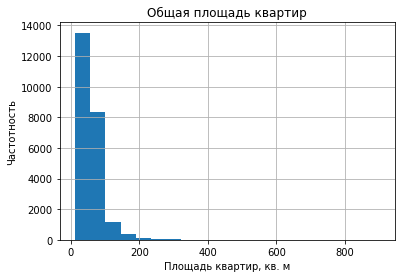

In [19]:
#для построения графика используем метод plot(), тип графика - гистограмма
data['total_area'].plot(kind='hist', title='Общая площадь квартир', grid=True, bins=20)
plt.xlabel('Площадь квартир, кв. м')
plt.ylabel('Частотность')
plt.show()

Наблюдаем наибольшее количество квартир с площадью около 50–60 кв. м, второй пик — жилье с площадью прибл. 70–100 кв. м. Реже встречается недвижимость более 150 квадратных метров, единичные случаи — жилье с площадью, превышающей 200 кв. метров. 

Можно предположить, что такое большое количество сравнительно небольших квартир (ок. 50 кв. м) связано с тем, что в таблице представлены в основном 1- и 2-комнатные квариры. Выясним, так ли это, построив гистрограмму столбца **с числом комнат**. 

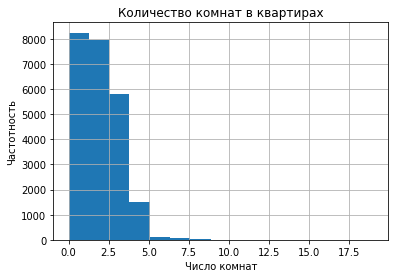

In [20]:
#применим метод plot(), количество корзин = 15
data['rooms'].plot(kind='hist', title='Количество комнат в квартирах', grid=True, bins=15)
plt.xlabel('Число комнат')
plt.ylabel('Частотность')
plt.show()

Наиболее часто встречаются объявления о продаже 1- и 2-комнатных квартир, но и трехкомнатные также в топе. Реже попадаются публикации о 4-комнатных и более. 

Теперь исследуем разброс **цен на недвижимость**. Для начала вызовем метод *describe()*, чтобы узнать характерные значения столбца *last_price*: 

In [21]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Среднее значение цены составляет 6,5 млн, медианное — 4,5. Максимальная цена, указанная в таблице более 750 млн рублей. 

Для построения гистрограммы за максимум возьмем значение в 12 млн и установим диапазон цены:

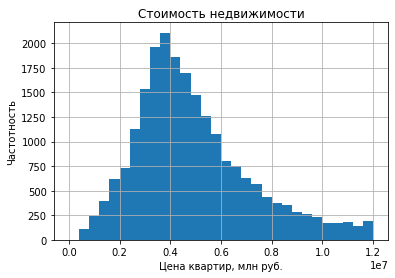

In [22]:
#количество корзин = 30
data['last_price'].plot(kind='hist', title='Стоимость недвижимости', grid=True, bins=30, range=(0, 12000000))
plt.xlabel('Цена квартир, млн руб.')
plt.ylabel('Частотность')
plt.show()

Пиковые значения приходятся на стоимость прибл. в 4 млн рублей, чаще всего цена колеблется приблизительно от 3 до 5 миллионов. Выводы по этим данным пока делать рано, мы помним, что в таблице представлены и квартиры в Санкт-Петербурге (с очевидно высокими ценами), и в пригородах, где стоимость недвижимости ниже. 

Проверим также распределение стоимости **квадратного метра**:

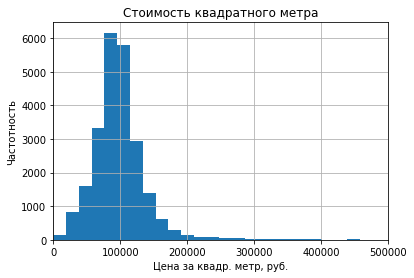

In [23]:
#построим гистограмму столбца price_sq_meter
data['price_sq_meter'].plot(kind='hist', title='Стоимость квадратного метра', grid=True, bins=100, xlim=(0, 500000))
plt.xlabel('Цена за квадр. метр, руб.')
plt.ylabel('Частотность')
plt.show()

Средняя стоимость квадратного метра — 80–90 тыс. рублей. В целом цена распределяется равномерно, от 40 до 150 тыс. рублей за квадратный метр. Есть и подозрительные значения, превышающие 300 000 р. 

Проанализируем **высоту потолков**. Построим гистограмму, в которой укажем количество корзин = 30, и диапазон высоты от 0 до 5 метров.

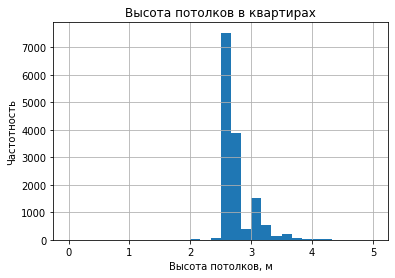

In [24]:
data['ceiling_height'].plot(kind='hist', title='Высота потолков в квартирах', grid=True, bins=30, range=(0, 5))
plt.xlabel('Высота потолков, м')
plt.ylabel('Частотность')
plt.show()

Средняя высота потолков в квартирах — от 2,5 до 2,8 метров. Есть примерно полторы тысячи объявлений с недвижимостью, потолки в которых чуть более 3 метров. Имеются и странные значения с потолками в 2 или более 4 метров.

### Вывод

Мы построили гистограммы по четырем параметрам — площадь квартиры, цена, количество комнат и высота потолков — и можем описать среднюю квартиру, выставленную на продажу. Это 2-комнатная квартира, площадью 60 кв. метров и высотой потолка 2,5 метра. Ее стоимость составляет приблизительно 3,8 млн рублей. При анализе графиков мы столкнулись со странными значениями, в дальнейшем нам предстоит разобраться, нет ли в них выбросов. 

### 4.2 Сколько обычно длится продажа квартиры? <a id="howlong"></a>

Выясним среднее время продажи квартиры — от размещения объявления на сайте до его снятия с публикации. 

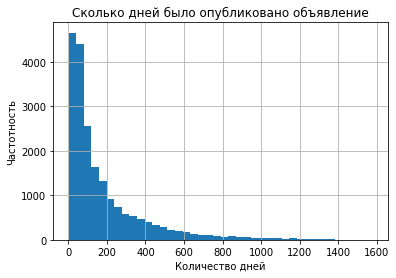

In [25]:
data['days_exposition'].plot(kind='hist', title='Сколько дней было опубликовано объявление', grid=True, bins=40)
plt.xlabel('Количество дней')
plt.ylabel('Частотность')
plt.show()

Чаще всего квартиру удается продать не дольше, чем за 100 дней после публикации объявления: пик приходится на прибл. 45 дней, доля продаж квартир за три месяца тоже высока. Это скорее всего связано с правилами сервиса Яндекс.Недвижимость. Сроки публикации объявления зависят от стоимости квартиры и составляют 45, 60 или 90 дней. Гораздо реже недвижимость продается в течение 300–400 дней, хотя есть отдельные случаи, когда жилье было выставлено на продажу более полутора лет.

### Вывод

Выяснили, что пиковые значения количества дней продажи недвижимости напрямую связаны с правилами публикации на Яндекс.Недвижимость — объявления размещают на 45, 60 или 90 дней. В целом в большинстве случаев удается продать квартиру менее чем за полгода. При этом мы заметили аномальные значения, когда жилье продавали более полутора лет. Если учесть, что данные для этого столбца собирались автоматически, сложно назвать эти выбивающиеся значения выбросами, удалять их тоже не стоит. 

### 4.3 Анализ редких значений и выбросов <a id="rare"></a>

На предыдущем этапе мы уже столкнулись с аномальными значениями числа дней продажи недвижимости, но пришли к выводу, что избавляться от этих данных не стоит. Тем не менее, для правильного анализа необходимо определить, есть ли выбросы в других столбцах. 

Выясним, есть ли выбросы в столбцах, для которых мы уже строили гистограммы и с которыми нам предстоит работать: с площадью, количеством комнат, высотой потолков и стоимостью квартиры и квадратного метра. Проверим их значения, построив диаграммы размаха — данные, которые будут выходить за границы "усов", будем считать выбросами. 

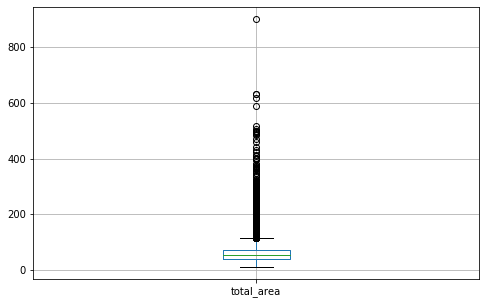

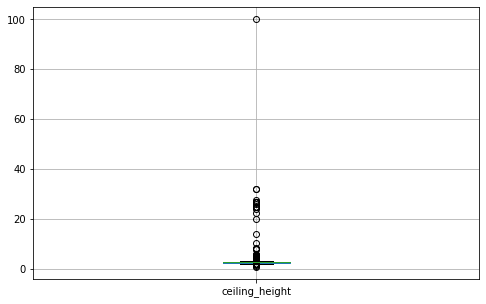

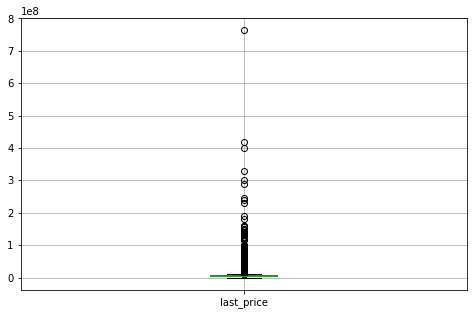

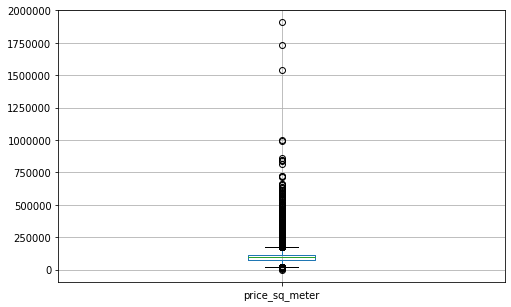

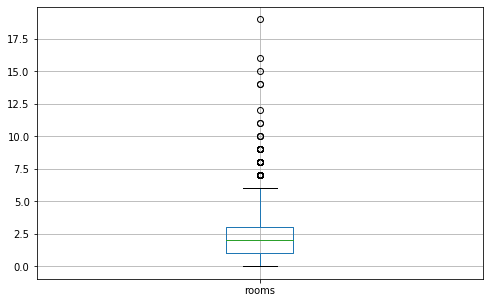

In [26]:
#в переменной columns_rare запишем 5 столбцов с нужной для нас информацией
columns_rare = data[['total_area', 'ceiling_height', 'last_price', 'price_sq_meter', 'rooms']]

#напишем цикл, который будет строить диаграммы размаха для каждого из столбцов
for column in columns_rare:
    data.boxplot(column, figsize=(8, 5))
    plt.show()

На полученных графиках сложно понять, где именно начинается отметка с выбросами в столбцах с высотой потолков и полной стоимостью квартиры. Вызовем метод *quantile()*, чтобы вычислить это значение:

In [27]:
#для метода quantile() установим значение = 0,95
print('Верхняя граница выбросов в столбце [ceiling_height]:', data['ceiling_height'].quantile(0.95))
print('Верхняя граница выбросов в столбце [last_price]:', data['last_price'].quantile(0.95))

Верхняя граница выбросов в столбце [ceiling_height]: 3.3
Верхняя граница выбросов в столбце [last_price]: 15300000.0


С помощью диаграммы размаха наглядно оценили выбросы в столбцах. В *total_area* нужно оставить значения от 20 до 120 кв. м, в *ceiling_height* — значения от 2,2 до 3,3 метров, количество комнат ограничим 6. 

Разумнее будет удалить выбросы по стоимости квадратного метра, а не целой квартиры, так как мы не видим площадь очень дорогих объектов. Для цены квадратного метра в *price_sq_meter* зададим границы от 20 до 170 тысяч рублей. 

In [28]:
#сохраним эти изменения в новый датафрейм data1
data1 = (data
         .query('total_area > 20 & total_area < 120 & rooms < 6') 
         .query('ceiling_height > 2.2 & ceiling_height < 3.3')
         .query('price_sq_meter > 20000 & price_sq_meter < 170000')
        ) 

#проверим общую информацию о новой таблице
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12812 entries, 0 to 23698
Data columns (total 29 columns):
total_images            12812 non-null int64
last_price              12812 non-null int64
total_area              12812 non-null float64
first_day_exposition    12812 non-null datetime64[ns]
rooms                   12812 non-null int64
ceiling_height          12812 non-null float64
floors_total            12812 non-null int64
living_area             12812 non-null float64
floor                   12812 non-null int64
is_apartment            12812 non-null bool
studio                  12812 non-null bool
open_plan               12812 non-null bool
kitchen_area            12812 non-null float64
balcony                 12812 non-null int64
locality_name           12802 non-null object
airports_nearest        9981 non-null float64
cityCenters_nearest     9990 non-null float64
parks_around3000        9991 non-null float64
parks_nearest           4222 non-null float64
ponds_around3000 

Пропуски в новой таблице остались только в автоматически сформированных столбцах: с указанием расстояния до центра города, парков и водоемов, а также с количеством дней, когда было опубликовано объявление. Кроме этого, отсутствуют названия у десяти  населенных пунктов.

### Вывод

Избавились от выбивающихся данных в нашей таблице. С помощью диаграмм размаха выявили выбросы в значениях общей площади квартир, числа комнат, высоты потолков и стоимости квадратного метра. Очищенные данные записали в новый датафрейм — *data1*, с ним в последствии и будем работать. 

### 4.4 Что влиет на стоимость квартиры? <a id="price"></a>

Нам предстоит найти основные факторы, влияющие на стоимость объектов недвижимости. Необходимо изучить взаимосвязь цены и площади квартиры, числа комнат, удаленности от центра. 

Будет ли меняться цена при увеличении площади квартиры? Построим диаграмму рассеяния для столбцов *last_price* и *total_area*. В данном случае будем брать в рассчет именно значения полной стоимости, а не цену квадратного метра.

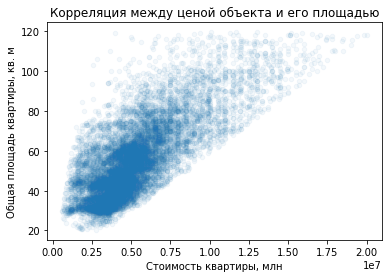

Коэффициент корреляции Пирсона составляет 0.7633578078239143


In [29]:
#получим диаграмму методом plot()
data1.plot(x='last_price', y='total_area', title ='Корреляция между ценой объекта и его площадью', kind='scatter', alpha=0.05)
plt.xlabel('Стоимость квартиры, млн')
plt.ylabel('Общая площадь квартиры, кв. м')
plt.show()
#выведем на экран коэфф. корреляции с помощью метода corr()
print('Коэффициент корреляции Пирсона составляет {}'.format(data1['last_price'].corr(data1['total_area'])))

График показывает положительную корреляцию: при большей площади недвижимости увеличивается и ее стоимость. 

Есть ли взаимосвязь между числом комнат и стоимостью квадратного метра? Вычислим медианную цену квадратного метра и построим диаграмму по этому значению:

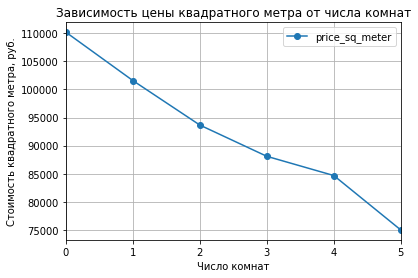

In [30]:
(data1
     #создаем таблицу с числом комнат и медианной стоимостью квартир
     .pivot_table(index='rooms', values='price_sq_meter', aggfunc='median')
     .plot(style='-o', grid=True, title='Зависимость цены квадратного метра от числа комнат')
)
plt.xlabel('Число комнат')
plt.ylabel('Стоимость квадратного метра, руб.')
plt.show()

Между числом комнат в квартире и стоимостью квадратного метра наблюдается отрицательная корреляция. Квадратный метр в студии стоит дороже, чем в многокомнатной квартире. 

Проверим, как меняется цена в зависимости от удаленности жилья от центра Санкт-Петербурга.

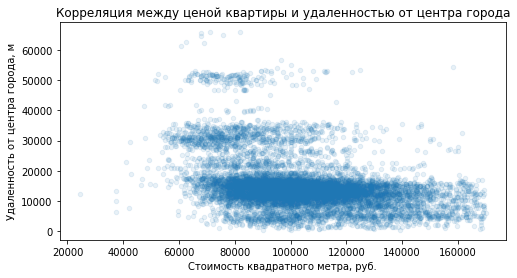

Коэффициент корреляции Пирсона составляет -0.3902707166643701


In [31]:
data1.plot(x='price_sq_meter', y='cityCenters_nearest', title ='Корреляция между ценой квартиры и удаленностью от центра города', kind='scatter', alpha=0.1, figsize=(8, 4))
plt.xlabel('Стоимость квадратного метра, руб.')
plt.ylabel('Удаленность от центра города, м')
plt.show()

print('Коэффициент корреляции Пирсона составляет {}'.format(data1['price_sq_meter'].corr(data1['cityCenters_nearest'])))

Здесь также наблюдаем отрицательную корреляцию: квадратный метр в пригороде стоит дешевле, чем в центре Петербурга.

Выясним, существует ли зависимость стоимости жилья от того, на каком этаже расположена квартира: на первом, последнем или другом. Для этого построим диаграмму, сгруппировав медианные значения цены за квадратный метр:

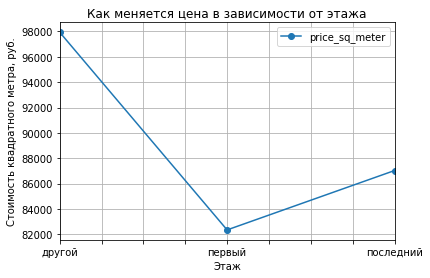

In [32]:
(data1
     #создаем таблицу с категорией этажа и медианой цены за квадр. метр
    .pivot_table(index='floor_category', values='price_sq_meter', aggfunc='median')
    .plot(grid=True, style='-o', title='Как меняется цена в зависимости от этажа')
)
plt.xlabel('Этаж')
plt.ylabel('Стоимость квадратного метра, руб.')
plt.show()

Наблюдаем нелинейную зависимость между стоимостью квадратного метра и этажом. На первом и последнем этаже квадратный метр стоит дешевле, чем на любом другом этаже. 

Может ли на стоимость квадратного метра повлиять такой неочевидный фактор как время размещения объявления? В какой день недели публикуют самые дорогие квартиры? 

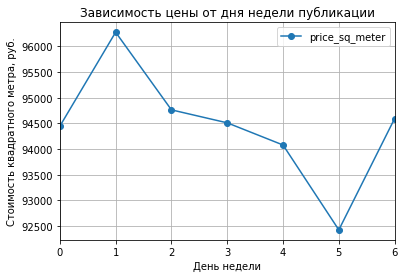

In [33]:
(data1
     #сформируем таблицу с днями недели и медианой квадратного метра
     .pivot_table(index='weekday', values='price_sq_meter', aggfunc='median')
     .plot(style='-o', grid=True, title='Зависимость цены от дня недели публикации')
) 
plt.xlabel('День недели')
plt.ylabel('Стоимость квадратного метра, руб.')
plt.show()

Объявления с самыми дорогими квартирами публикуются во вторник, самые дешевые — в субботу. В остальные дни недели цена квадратного метра мало отличается друг от друга. Не можем сказать, на стоимости квартиры сказывается то, в какой день было размещено объявление о ее продаже.

Возможно, есть зависимость от месяца, в который опубликовали объявление. Существует ли так называемая "сезонность"? Считается, что квартиры дешевле покупать летом, перед сезоном отпусков. Проверим, так ли это, построив график соотношения медианной цены квадратного метра и месяца публикации:

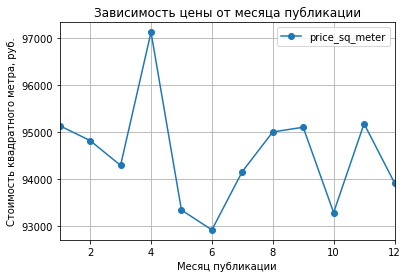

In [34]:
(data1
     .pivot_table(index='month', values='price_sq_meter', aggfunc='median')
     .plot(style='-o', grid=True, title='Зависимость цены от месяца публикации')
)
plt.xlabel('Месяц публикации')
plt.ylabel('Стоимость квадратного метра, руб.')
plt.show()

В мае, июне и октябре публикуются объявления с самыми низкими ценами на квартиры, пиковое значение приходитя на апрель, когда рынок недвижимости "просыпается". В другие месяцы стоимость квадратного метра распределена равномерно, без больших различий. 

Проанализируем и влияние года публикации на стоимость квадратного метра. По графику сможем оценить, как менялась его цена за последние несколько лет:

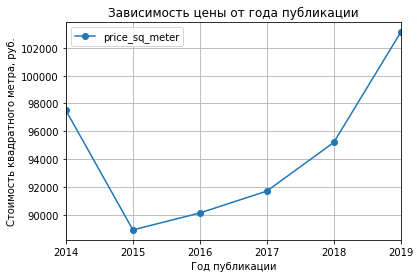

In [35]:
(data1
     #сгруппируем данные по году публикации и медиане квадратного метра
     .pivot_table(index='year', values='price_sq_meter', aggfunc='median')
     .plot(style='-o', grid=True, title='Зависимость цены от года публикации')
)
plt.xlabel('Год публикации')
plt.ylabel('Стоимость квадратного метра, руб.')
plt.show()

Получили, что в 2015 году была самая низкая цена квадратного метра за последние несколько лет. Это подтверждают данные официальной статистики: с 2015 года стоимость недвижимости в Санкт-Петербурге только растет. 

### Вывод

Полученные данные в целом не противоречат ситуации на рынке недвижимости. Стоимость жилья возрастает при увеличении общей площади объекта. Чем больше комнат в квартире, и чем дальше она расположена от центра города, тем цена будет ниже. Самые дешевые квартиры — на первом и последнем этаже. На стоимость жилья сказывается и время публикации объявления: выгоднее всего продавать в середине весны, а ближе к лету, наоборот, цена будет падать. 

### 4.5 В каких населенных пунктах больше всего объявлений о продаже? <a id="local"></a>

Найдем 10 населенных пунктов с наибольшим числом объявлений и выясним отличия в стоимости недвижимости. 

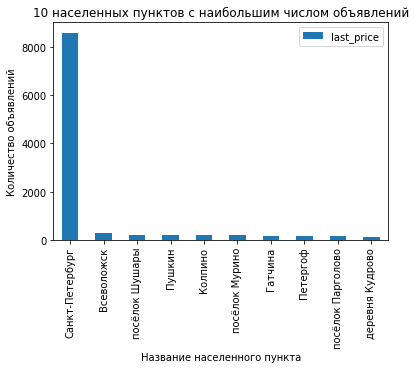

In [36]:
#в переменной top10 сохраним 10 населенных пунктов с наибольшим числом объявлений
#сгруппируем data1 по столбцу Locality_name, в качестве счетчика используем столбец last_price
#отсортируем полученные данные в порядке убывания
top10 = data1.groupby('locality_name').agg({'last_price':'count'}).sort_values(by='last_price', ascending=False).head(10)

#выведем диаграмму для топ-10
top10.plot(kind='bar', title='10 населенных пунктов с наибольшим числом объявлений')
plt.xlabel('Название населенного пункта')
plt.ylabel('Количество объявлений')
plt.show()

По количеству объявлений о продаже недвижимости ожидаемо лидирует Санкт-Петербург. Между остальными 9 населенными пунктами различия в числе публикаций небольшие. В наш список в итоге попали Всеволожск, Шушары, Пушкин, Колпино, Мурино, Гатчина, Петергоф, Парголово и Кудрово. 

Создадим новый срез *data1_top10*: он сохранит из датафрейма *data1* только строки с топ-10 населенными пунктами. В этом срезе будем производить наши расчеты. 

In [37]:
#создадим новый срез data1_top10
data1_top10 = data1.query('locality_name in @top10.index')
#выведем на экран первые 10 строк столбцов с названием насел. пункта и стоимостью квадратного метра 
data1_top10[['locality_name', 'price_sq_meter']].head(10)

,locality_name,price_sq_meter
0,Санкт-Петербург,120370
4,Санкт-Петербург,100000
9,Санкт-Петербург,88524
10,Санкт-Петербург,127525
13,Петергоф,82943
16,Санкт-Петербург,81707
18,Санкт-Петербург,104838
20,посёлок Парголово,76500
22,деревня Кудрово,86206
23,Санкт-Петербург,92187


Теперь мы можем вычислить среднюю цену квадратного метра в 10 населенных пунктах. Также выясним для каждого населенного пункта максимальное и минимальное значение полной стоимости недвижимости.

In [38]:
#в срезе data1_top10 сохраним группировку по столбцу locality_name 
#в словаре добавим среднюю цену за квадратный метр и максимум и минимум полной стоимости жилья
data1_top10 = data1_top10.groupby('locality_name').agg({'price_sq_meter':['mean'], 'last_price':['max', 'min']})

#отсортируем значения data1_top10 по максимальной стоимости квартиры
data1_top10.sort_values(by=('last_price', 'max'), ascending=False)    

price_sq_meter last_price         
                            mean        max      min
locality_name                                       
Санкт-Петербург    106345.693122   20000000  1200000
Пушкин             101648.919811   16912000  2400000
Гатчина             70560.118056   13900000  1100000
Колпино             76031.445000   12750000  2100000
Петергоф            83878.586957   12000000  2100000
Всеволожск          67270.090566   10300000  1290000
посёлок Шушары      79456.269767   10100000  2000000
деревня Кудрово     90777.565574    9950000  2100000
посёлок Парголово   90900.927007    9140000  2500000
посёлок Мурино      87368.545455    7500000  1730000

Самая дорогая квартира — в Санкт-Петербурге, стоимостью в 20 млн рублей. Самая высокая средняя цена за квадратный метр также в Петербурге. На втором месте по обоим показателям — Пушкин, причем разница в средней стоимости квадратного метра невысока, 5 тысяч рублей. Также имеется большой разброс полной стоимости квартиры: между первым местом (Санкт-Петербург) и десятым (Мурино) разница в 12,5 миллионов рублей. 

Как распределились минимальные цены на квартиры? 

In [39]:
data1_top10.sort_values(by=('last_price', 'min'), ascending=True)

price_sq_meter last_price         
                            mean        max      min
locality_name                                       
Гатчина             70560.118056   13900000  1100000
Санкт-Петербург    106345.693122   20000000  1200000
Всеволожск          67270.090566   10300000  1290000
посёлок Мурино      87368.545455    7500000  1730000
посёлок Шушары      79456.269767   10100000  2000000
Колпино             76031.445000   12750000  2100000
Петергоф            83878.586957   12000000  2100000
деревня Кудрово     90777.565574    9950000  2100000
Пушкин             101648.919811   16912000  2400000
посёлок Парголово   90900.927007    9140000  2500000

Самое недорогое жилье в Гатчине, следом по этому показателю снова Санкт-Петербург и (с небольшой разницей) Всеволожск. При этом разница 1-го и 10-го места составлят 1,4 миллиона. 

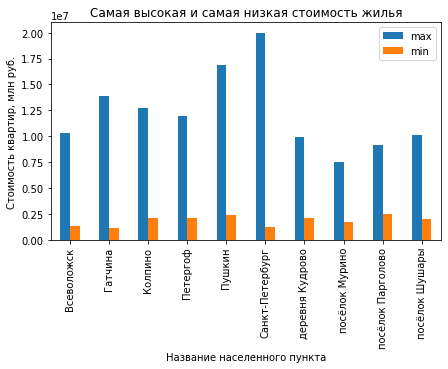

In [40]:
#построим диаграмму для минимальной и максимальной цены жилья в топ-10
data1_top10.plot(y='last_price', kind='bar', title='Самая высокая и самая низкая стоимость жилья', figsize=(7, 4))
plt.xlabel('Название населенного пункта')
plt.ylabel('Стоимость квартир, млн руб.')
plt.show()

### Вывод

Мы выявили 10 населенных пунктов с самым большим количеством публикаций. Лидером по числу объявлений стал Санкт-Петербург. Остальные 9 городов и поселков находятся в ближайших к Петербургу районах, где последние несколько лет идет активное строительство новых домов. Самая низкая цена квартиры — 1,1 миллиона рублей — встретилась в Гатчине, самая высокая — в Санкт-Петербурге — 20 миллионов рублей. При этом значения максимальной стоимости квартиры распределяются с большей разницей, по сравнению с минимальной. 

### 4.6 Как цена зависит от удаленности от центра Санкт-Петербурга? <a id="suburb"></a>

В центре Санкт-Петербурга квартиры продаются с большей ценой, чем на окраинах города. Но как определить, где заканчивается центр Петербурга? Попробуем вычислить границы центра по стоимости квартир. 

Создадим срез *data1_spb*, в который поместим только квартиры из Санкт-Петербурга:

In [41]:
#срез data1_spb, в который попадут только строки с названием населенного пункта "Санкт-Петербург"
data1_spb = data1.query('locality_name == "Санкт-Петербург"')
#выведем 7 случайных строчек столбцов с названием города и расстоянием до центра
data1_spb[['locality_name', 'cityCenters_nearest']].sample(5)

,locality_name,cityCenters_nearest
14938,Санкт-Петербург,13251.0
18411,Санкт-Петербург,11668.0
23515,Санкт-Петербург,11296.0
5623,Санкт-Петербург,14935.0
17959,Санкт-Петербург,15582.0


Для удобства вычислений создадим новый столбец *cityCenters_nearest_km*, в который запишем расстояние до центра Петербурга в километрах:

In [42]:
#поделим значения столбца cityCenters_nearest и округлим методом round() полученные значения в км
data1_spb['cityCenters_nearest_km'] = round(data1_spb['cityCenters_nearest'] / 1000)
#получим 7 случайных строчек двух столбцов с расстоянием до центра: в метрах и в километрах
data1_spb[['cityCenters_nearest', 'cityCenters_nearest_km']].sample(5)

,cityCenters_nearest,cityCenters_nearest_km
23340,11356.0,11.0
10572,13460.0,13.0
6741,12863.0,13.0
22113,5580.0,6.0
3935,15940.0,16.0


Вычислим медианную цену для каждого километра и построим график, показывающий, как меняется цена в зависимости от расстояния от центра. По этому графику мы сможем определить, где проходит граница центральной зоны Санкт-Петербурга.

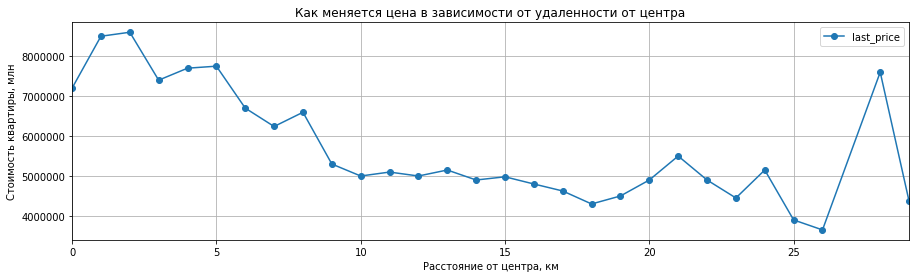

In [43]:
(data1_spb
     #построим сводную таблицу расстояния до центра в км и медианной цены квартиры
    .pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='median')
     #выведем график, показывающий зависимость двух значений
    .plot(style='-o', title = 'Как меняется цена в зависимости от удаленности от центра', figsize=(15, 4), grid=True)
)
plt.xlabel('Расстояние от центра, км')
plt.ylabel('Стоимость квартиры, млн')
plt.show()

Судя по графику, стоимость начинает падать после восьмого километра. Также наблюдаем большой пик на значении в 28 км. Создадим срез, чтобы посмотреть, какие квартиры подходят под этот параметр:

In [44]:
#создаем срез, в котором расстояние до центра составляет 28 км
data1_spb.query('cityCenters_nearest_km == 28')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_sq_meter,weekday,month,year,floor_category,living_area_ratio,kitchen_area_ratio,cityCenters_nearest_km
814,0,7600000,111.0,2017-07-26,3,3.0,16,63.0,12,False,...,72.0,66.0,68468,2,7,2017,другой,0.567568,0.126126,28.0


Под это описание подходит только одна квартира стоимостью в 7,6 млн рублей. Это объясняет пик на нашем графике. Можно сделать вывод, что центральная зона Санкт-Петербурга ограничивается радиусом в 8 км.

### Вывод

Мы создали срез, в который попали только квартиры Санкт-Петербурга. Для каждого объекта вычислили его расстояние до центра города в километрах. Затем мы построили график зависимости медианной стоимости жилья и его удаленности от центра. Полученная диаграмма показывает, что центральная часть города заканчивается на 8 километре от центральной точки. 

### 4.7 В чем особенность квартир в центре Санкт-Петербурга? <a id="center"></a>

Теперь мы можем проанализировать жилье в центре Санкт-Петербурга и выделить основные особенности. Изучим характеристики квартир по их площади, стоимости, количестве комнат и высоте потолков. Сравним показатели недвижимости центра города и всего Санкт-Петербурга в целом. 

Создадим срез *data1_spb_center*, в котором сохраним жилье в центре Петербурга. В переменной *data1_spb_center_4* выведем четыре столбца с информацией о площади, цене, числе комнат и высоте потолков:

In [45]:
#срез, в котором значения расстояния до центра меньше 8 км
data1_spb_center = data1_spb.query('cityCenters_nearest_km < 8')
#создадим переменную, в которой будут только 4 нужных нам столбца
data1_spb_center_4 = data1_spb_center[['total_area', 'last_price', 'rooms', 'ceiling_height']]
#выведем случайные 5 строчек
data1_spb_center_4.sample(5)

,total_area,last_price,rooms,ceiling_height
22081,61.3,7722600,2,2.75
2387,90.0,11500000,3,2.90
19442,95.5,10517631,3,2.70
13961,68.6,7952112,2,2.70
15404,98.4,8000000,3,3.00


Сохраним аналогичную переменную с четырьмя столбцами, но с данными по всему городу. За основу возьмем срез *data1_spb*:

In [46]:
#создадим переменную data1_spb_all_4 
data1_spb_all_4 = data1_spb[['total_area', 'last_price', 'rooms', 'ceiling_height']]
#выведем 5 рандомных строчек
data1_spb_all_4.sample(5)

,total_area,last_price,rooms,ceiling_height
10844,52.2,5200000,2,2.65
15148,79.6,7849000,3,2.67
8527,97.0,9900000,4,3.00
5882,34.0,4700000,1,2.65
5844,61.2,7100000,2,2.78


Для анализа четырех параметров жилья (площади, стоимости, числа комнат, высоты потолков) построим матрицу диаграмм рассеяния для центра города.

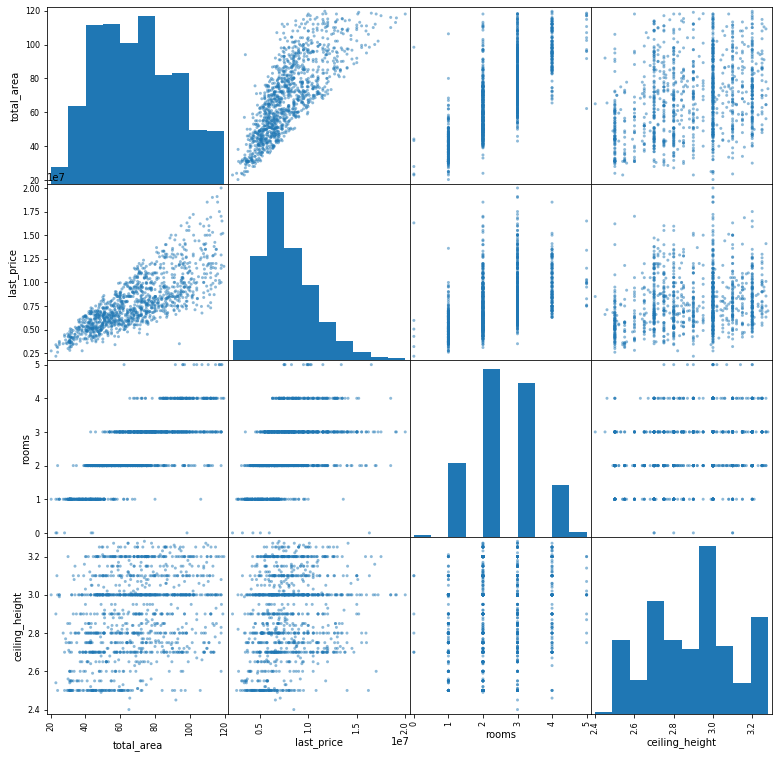

Матрица корреляции:


,total_area,last_price,rooms,ceiling_height
total_area,1.000000,0.778188,0.765887,0.300390
last_price,0.778188,1.000000,0.470692,0.210382
rooms,0.765887,0.470692,1.000000,0.254874
ceiling_height,0.300390,0.210382,0.254874,1.000000


In [47]:
#вызовем метод pd.plotting.scatter_matrix, в параметрах укажем переменную data1_spb_center_4 и масштаб графиков
pd.plotting.scatter_matrix(data1_spb_center_4, figsize=(13, 13))
plt.show()

#создадим также матрицу корреляции коэффициента Пирсона
print('Матрица корреляции:')
data1_spb_center_4.corr()

По полученной матрице можем выявить характеристики квартир в центре Санкт-Петербурга:
* Больше всего квартир с площадью от 40 до 80 кв. м. 
* Цена напрямую зависит от площади: чем больше квартира, тем выше ее стоимость.
* Между площадью и количеством комнат также наблюдаем линиейную зависимость — они увеличиваются равномерно.
* Чем больше площадь квартиры, тем чаще в них встречаются высокие потолки, но эта взаимосвязь слабая
* Самая распространенная стоимость квартиры в центре города — прибл. 7,5 млн рублей.
* Цена квартиры тем выше, чем больше в ней комнат.
* Высота потолков никак не влияет на стоимость квартиры.
* Большинство квартир в центре города 2- или 3-комнатные.
* Количество комнат и высота потолков в них не связаны между собой.
* В квартирах центра Петербурга чаще встречаются 3-метровые потолки.

Построим аналогичную матрицу для недвижимости всего Петербурга и проведем такой же анализ: 

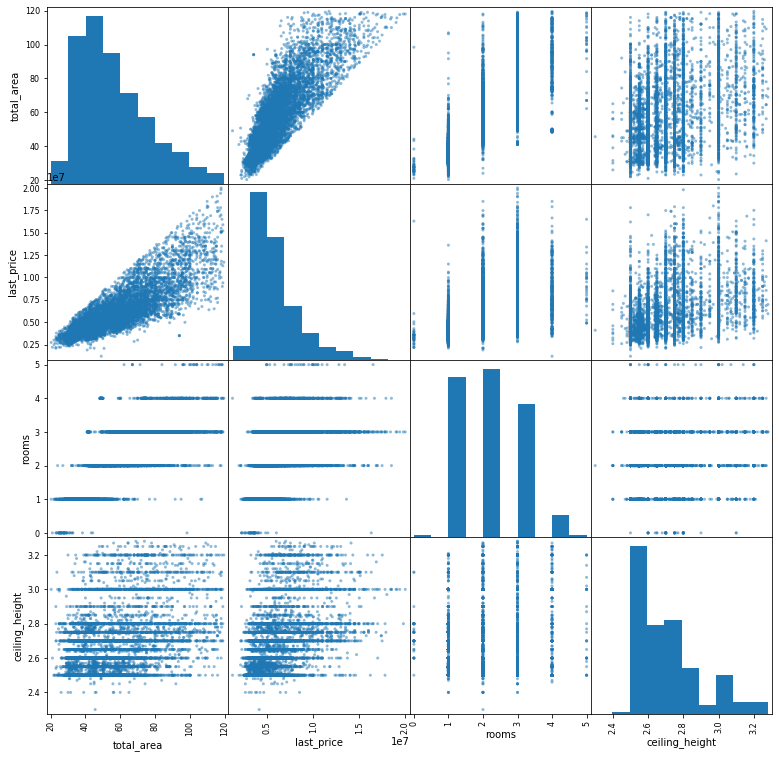

Матрица корреляции:


,total_area,last_price,rooms,ceiling_height
total_area,1.000000,0.840945,0.783018,0.386005
last_price,0.840945,1.000000,0.520433,0.459781
rooms,0.783018,0.520433,1.000000,0.120551
ceiling_height,0.386005,0.459781,0.120551,1.000000


In [48]:
#в параметрах метода pd.plotting.scatter_matrix укажем переменную data1_spb_all_4
pd.plotting.scatter_matrix(data1_spb_all_4, figsize=(13, 13))
plt.show()

#также выведем матрицу корреляции коэфф. Пирсона
print('Матрица корреляции:')
data1_spb_all_4.corr()

В чем заключаются особенности квартир в Петербурге?
* Общая площадь квартир колеблется от 30 до 60 квадратных метров.
* Наблюдаем линейную зависимость между площадью квартиры, ее стоимостью и количеством комнат.
* Высота потолков не связана с площадью квартиры, ее стоимостью или количеством комнат в ней.
* Больше всего квартир стоимостью прибл. 4 млн рублей. 
* Самые распространенные 1- и 2-комнатные квартиры.
* Чаще встречаются квартиры с 2,5-метровыми потолками.


Выделим также факторы, которые могут повлиять на стоимость квартиры: число комнат, этаж (первый, последний или другой), удаленность от центра и дата размещения объявления. 

In [49]:
#в переменной data1_spb_center_fact сохраним 7 столбцов с информацией по центру СПб
data1_spb_center_fact = data1_spb_center[['last_price', 'rooms', 'floor_category', 'cityCenters_nearest_km', 'weekday', 'month', 'year']]
#выведем 5 случайных строк
data1_spb_center_fact.sample(5)

,last_price,rooms,floor_category,cityCenters_nearest_km,weekday,month,year
751,7000000,4,последний,2.0,2,2,2016
2387,11500000,3,первый,4.0,1,4,2019
20916,17200000,3,другой,4.0,3,8,2017
23188,11000000,3,другой,5.0,0,1,2018
17642,7300000,3,другой,3.0,3,11,2018


Построим графики зависимости 6 факторов на медианную стоимость жилья:

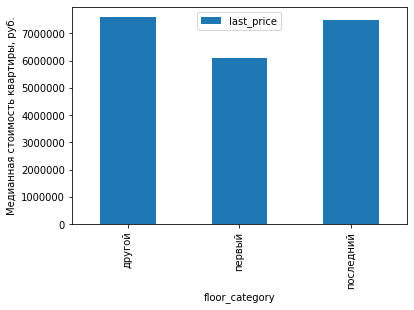

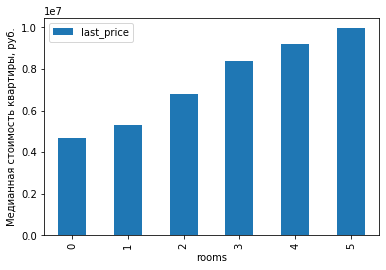

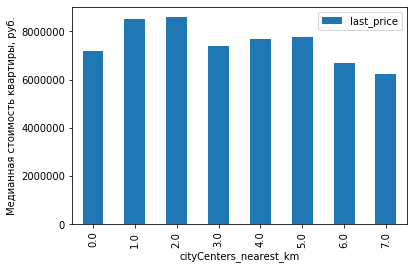

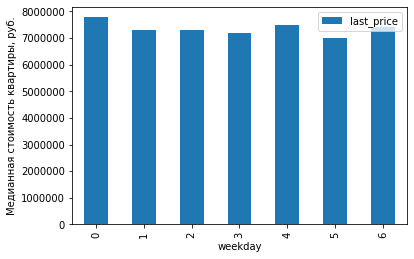

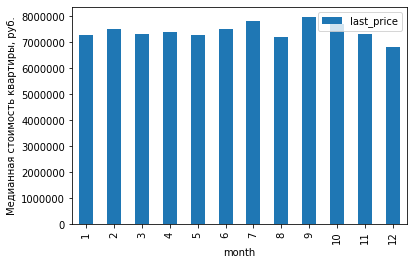

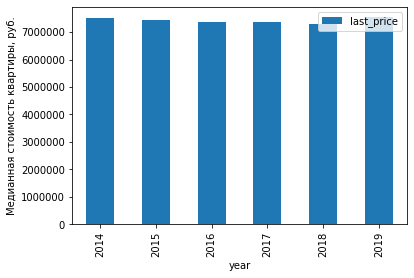

In [50]:
#в переменной columns сохраним 6 столбцов, по которым будем строить графики
columns = data1_spb_center_fact[['floor_category', 'rooms', 'cityCenters_nearest_km', 'weekday', 'month', 'year']]

#напишем цикл, который будет сгруппирует каждую колонку в columns по медианной стоимости 
#и построит график для каждого столбца
for column in columns:
    data1_spb_center_fact.groupby(column).agg({'last_price':'median'}).plot(kind='bar')
    plt.ylabel('Медианная стоимость квартиры, руб.')
    plt.show()

На ценообразование недвижимости в центре Санкт-Петербурга влияет количество комнат (чем их число больше, тем выше стоимость), а также то, на каком этаже расположена квартира: жилье на первом этаже стоит дешевле. В радиусе 5 км от центра медианная стоимость примерно одинаковая, но после 5-го километра цена начинает снижаться. Дата публикации объявления мало влияет на стоимость жилья в центре, можно только заметить небольшой спад цены в ноябре-декабре. Также в период с 2014 по 2019 год стоимость квартир в центре сохранялась на одном уровне.

Какое влияние оказывают эти же факторы на жилье в Санкт-Петербурге в целом? В переменной *data1_spb_all_fact* сохраним необходимые нам 7 столбцов и по аналогии с предыдущей задачей построим графики зависимости:

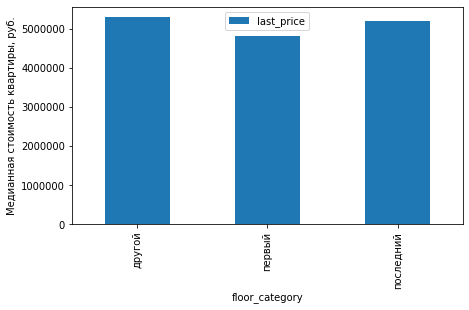

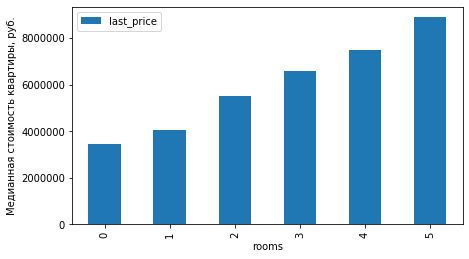

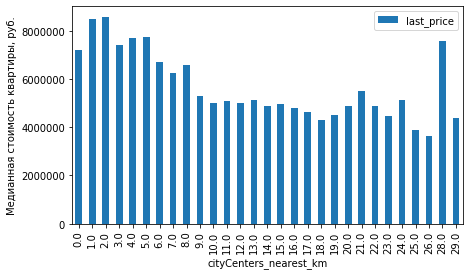

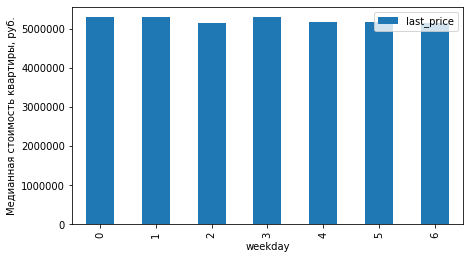

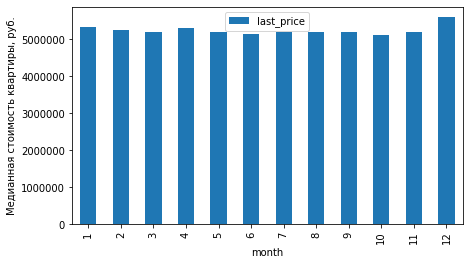

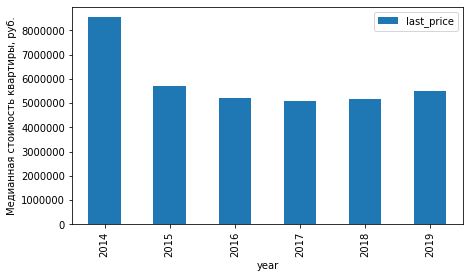

In [51]:
#создадим переменную data1_spb_all_fact 
data1_spb_all_fact = data1_spb[['last_price', 'rooms', 'floor_category', 'cityCenters_nearest_km', 'weekday', 'month', 'year']]
#в columns_all запишем 6 столбцов, по которым будем создавать графики
columns_all = data1_spb_all_fact[['floor_category', 'rooms', 'cityCenters_nearest_km', 'weekday', 'month', 'year']]

#напишем функцию, которая будет строить графики столбцов, сгруппированных по медианной стоимости 
for column in columns_all:
    data1_spb_all_fact.groupby(column).agg({'last_price':'median'}).plot(kind='bar', figsize=(7, 4))    
    plt.ylabel('Медианная стоимость квартиры, руб.')
    plt.show()

Стоимость жилья в Санкт-Петербурге растет с увеличением числа комнат в квартире, а также с ростом удаленности объекта от центра города. На первом этаже квартиры дешевле, но разница по сравнению с остальными этажами невысока. День недели и месяц, в которые было опубликовано объявление, не влияют на цену, хотя наблюдается небольшой рост стоимости в декабре. За последние несколько лет стоимость квартир в Санкт-Петербурге была высокой в 2014 году, к 2017 году она заметно снизилась. Но к 2019 на рынке недвижимости наблюдался небольшой рост цен. 

### Вывод

Сравнили жилье в центре Петербурга и во всем городе по четырем характеристикам: площадь квартиры, ее стоимость, число комнат и высота потолка. Мы наблюдаем одинаковую зависимость между площадью квартиры, ее ценой и числом комнат. В свою очередь, высота потолков, количество комнат и стоимость жилья никак не связаны между собой. При этом есть слабая связь между площадью квартиры в центре города и высотой потолков. Можно предположить, что это бывшие коммунальные квартиры, расположенные в домах старого фонда, потолки в них обычно выше 3 метров. И в целом в центральной зоне квартиры с высокими потолками (3 м) распространены гораздо выше, чем во всем городе — чаще встречаются 2,5-метровые. По понятным причинам стоимость жилья в центре выше: 7,5 млн против 4 млн рублей. Квартиры в центре также просторнее: чаще наблюдаем 2- или 3-комнатные квартиры до 80 кв. метров. Во всем городе этот показатель ниже: большее количество 1- и 2-комнатных квартир, площадью до 60 кв. метров.

И в центре города, и во всем Петербурге дешевые квартиры располагаются на 1 этаже. И для всего города сохраняется тенденция к уменьшению стоимости жилья при удаленности от центра. День недели и месяц публикации объявления не влияет на ценообразование, хотя в центре в ноябре-декабре наблюдается понижение цен. В период с 2014 по 2019 год в центре города стоимость практически не менялась. В то время как во всем Санкт-Петербурге цена падала с 2014 по 2017, но затем к 2019 году начала постепенно подниматься.

## 5 Общий вывод <a id="conclusion"></a>

В исследовании перед нами стояла задача определить, что влияет на формирование цены недвижимости Санкт-Петербурга. Между стоимостью квартиры, ее общей площадью и количеством комнат наблюдается прямая зависимость — цена растет при увеличении этих параметров. При этом стоимость квадратного метра обратно пропорциональна числу комнат: в студиях квадратный метр дороже, чем в многокомнатных квартирах. Еще один существенный фактор, влияющий на цену жилья, — удаленность от центра города. Если в пределах центральной зоны стоимость квартир мало различается, то при увеличении расстояния от центра цена начинает снижаться. Существует зависимость и от этажа, на котором расположена квартира — наблюдаем самую низкую стоимость жилья с первого и последнего этажа. Также обнаружили "сезонность" формирования цен на недвижимость. В начале весны рынок "просыпается", и цены начинают постепенно расти, но ближе к лету опускаются. Июнь — месяц, когда публиковали объявления с самой низкой стоимостью квартир. 

В ходе анализа мы не нашли корреляцию между стоимостью недвижимости и такими факторами, как высота потолков или день недели, в который было опубликовано объявление. Также мы пришли к выводу, что средняя стоимость жилья в Санкт-Петербурге с 2015 года только повышается, что соответствует реальной ситуации на рынке недвижимости. 